<a href="https://colab.research.google.com/github/Bala-Vignesh-S-M/Deposito/blob/main/DEPOSITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING PACKAGE**

# **DONE BY:** 
             19PD07 - BALA VIGNESH S M
             19PD20 - VIJAYALAKSHMI M S

# **Importing the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
%matplotlib inline

## **READING THE DATASET**

In [ ]:
data = pd.read_csv('/content/bank_term_deposit.csv')
df = data.copy()
df = df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
6,36.0,self-employed,married,tertiary,no,37.0,yes,no,cellular,14,may,341,1,330,2,other,no
7,39.0,technician,married,secondary,no,147.0,yes,no,cellular,6,may,151,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57.0,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no


### **We read the dataset and removed the rows with Nan values**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,41.555133,1155.146659,15.780554,265.297664,2.731668,41.074144,0.531233
std,10.713621,2823.072567,8.256166,259.800412,2.938882,102.164428,1.647313
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,32.000000,58.000000,8.000000,105.000000,1.000000,-1.000000,0.000000
50%,40.000000,314.500000,16.000000,188.000000,2.000000,-1.000000,0.000000
75%,49.000000,996.250000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,2769.000000,44.000000,871.000000,24.000000


### **We can see the mean, standard deviation, maximum values, etc of the individual feautures of the dataset in above table.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3682 non-null   float64
 1   job        3682 non-null   object 
 2   marital    3682 non-null   object 
 3   education  3682 non-null   object 
 4   default    3682 non-null   object 
 5   balance    3682 non-null   float64
 6   housing    3682 non-null   object 
 7   loan       3682 non-null   object 
 8   contact    3682 non-null   object 
 9   day        3682 non-null   int64  
 10  month      3682 non-null   object 
 11  duration   3682 non-null   int64  
 12  campaign   3682 non-null   int64  
 13  pdays      3682 non-null   int64  
 14  previous   3682 non-null   int64  
 15  poutcome   3682 non-null   object 
 16  y          3682 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 517.8+ KB


# **DATA VISUALISATION**

## **Bar graph of percentage job categories**

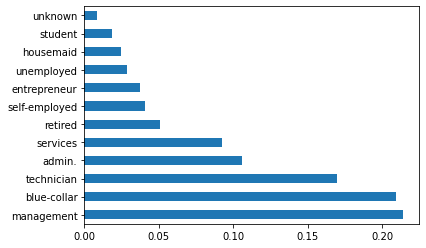

In [ ]:
data.job.value_counts(normalize=True)
data.job.value_counts(normalize=True).plot.barh()
plt.show()

### **We can see that there are more people in job management followed with Blue-collar and Technician**

## **Bar graph of percentage education categories**

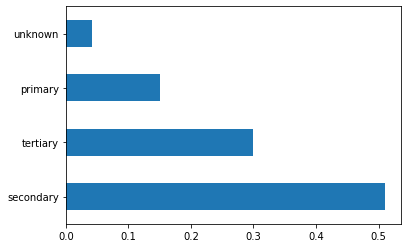

In [ ]:
data.education.value_counts(normalize=True)
data.education.value_counts(normalize=True).plot.barh()
plt.show()

### **We can see that there are more people with secondary Education**

## **Bar graph of percentage poutcome categories**

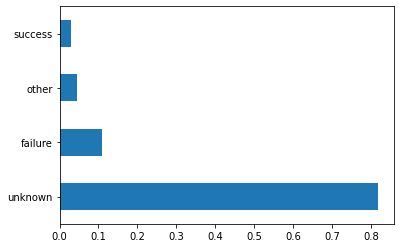

In [ ]:
data.poutcome.value_counts(normalize=True)
data.poutcome.value_counts(normalize=True).plot.barh()
plt.show()

### **We can see that more than 75 percentage of peoples has unknown poutcome**

## **Pie chart of Contact categories**

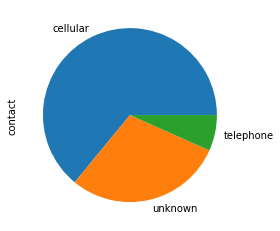

In [ ]:
data.contact.value_counts(normalize=True)
data.contact.value_counts(normalize=True).plot.pie()
plt.show()

### **We can see that many peoples are there with cellular contact**

## **Pie chart of output variable**

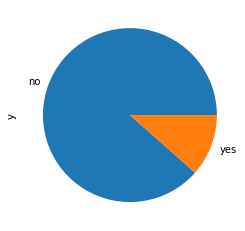

In [ ]:
data.y.value_counts(normalize=True)
data.y.value_counts(normalize=True).plot.pie()
plt.show()

### **We can clearly see that "no" is more dominant than "yes"**

## **Scatter plot between age and balance**

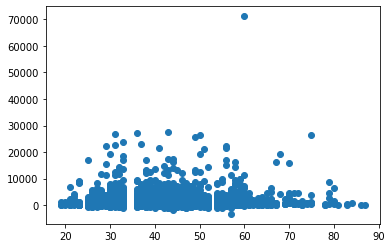

In [ ]:
plt.scatter(data.age,data.balance)
plt.show()

### **We can infer that age and balance is slightly left skewed or negatively skewed**

## **Scatter plot between duration and balance**

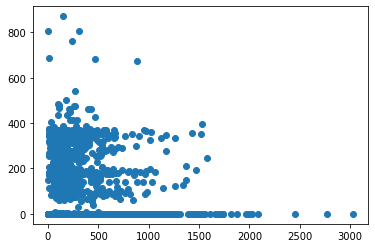

In [ ]:
plt.scatter(data.duration,data.pdays)
plt.show()

### **Its clear that we dont see any correlation here between the two feautures duration and pdays**

## **Pair plot between duration, balance and age**

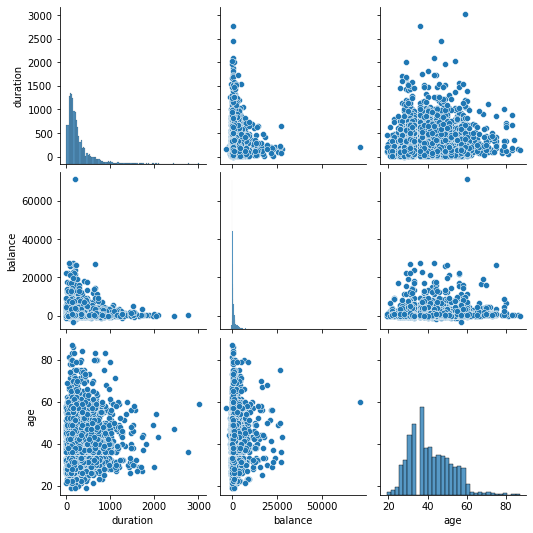

In [ ]:
sns.pairplot(data = data, vars=['duration','balance','age'])
plt.show()

### **Above plot is the scatter plots of every pair of feautures(duration balance, age)**

## **Correlation matrix of salary, balance and age.**

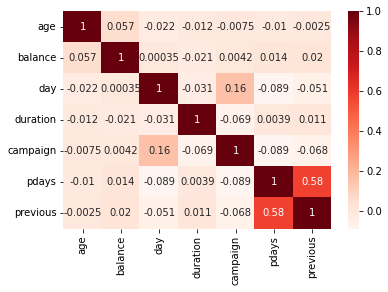

In [ ]:
da = df.drop(['y'], axis = 1)
print(da)
sns.heatmap(da.corr(), annot=True, cmap = 'Reds')
plt.show()

### **We can see that no two distict feautures have correlation coefficient more than 0.1 other than pdays and previous. So there isn't a problem of multicollinearity and problem of overfitting**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


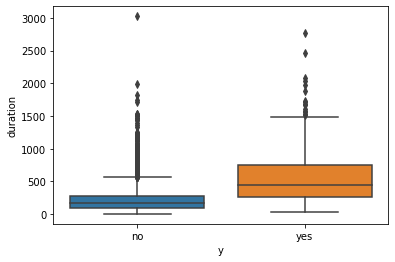

In [ ]:
sns.boxplot(data.y, data.duration)
plt.show()

### **Above is the box plot between output variable and duration which visually represents the outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


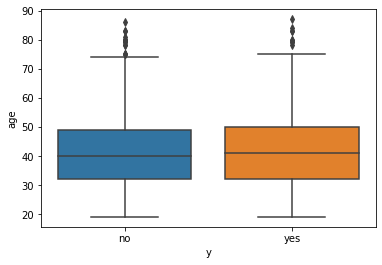

In [ ]:
sns.boxplot(data.y, data.age)
plt.show()

### **Above is the box plot between age and duration which visually represents the outlier**

# **PREPROCESSING THE DATASET**

## **We can't model the algorithms with catagorical feautures. So use the preprocessing library and LabelEncoder function to convert the feautures with catagorical values to integers or floats.**

In [ ]:
le = preprocessing.LabelEncoder()
job_encoded=le.fit_transform(df['job'])

In [ ]:
marital_encoded=le.fit_transform(df['marital'])

In [ ]:
education_encoded=le.fit_transform(df['education'])

In [ ]:
default_encoded=le.fit_transform(df['default'])

In [ ]:
housing_encoded=le.fit_transform(df['housing'])

In [ ]:
loan_encoded=le.fit_transform(df['loan'])

In [ ]:
contact_encoded=le.fit_transform(df['contact'])

In [ ]:
month_encoded=le.fit_transform(df['month'])

In [ ]:
poutcome_encoded=le.fit_transform(df['poutcome'])

In [ ]:
y_encoded = le.fit_transform(df['y'])

# **swapping the columns**

In [ ]:
#df = df.drop(['job', 'marital', 'poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education'], axis = 1)
df['job'] = list(job_encoded)
df['marital'] = list(marital_encoded)
df['poutcome'] = list(poutcome_encoded)
df['month'] = list(month_encoded)
df['contact'] = list(contact_encoded)
df['loan'] = list(loan_encoded)
df['housing'] = list(housing_encoded)
df['default'] = list(default_encoded)
df['education'] = list(education_encoded)
df['y'] = list(y_encoded)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,10,1,0,0,1787.0,0,0,0,19,10,79,1,-1,0,3,0
1,33.0,7,1,1,0,4789.0,1,1,0,11,8,220,1,339,4,0,0
3,30.0,4,1,2,0,1476.0,1,1,2,3,6,199,4,-1,0,3,0
6,36.0,6,1,2,0,37.0,1,0,0,14,8,341,1,330,2,1,0
7,39.0,9,1,1,0,147.0,1,0,0,6,8,151,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,7,1,1,0,-333.0,1,0,0,30,5,329,5,-1,0,3,0
4517,57.0,6,1,2,1,-3313.0,1,1,2,9,8,153,1,-1,0,3,0
4518,57.0,9,1,1,0,295.0,0,0,0,19,1,151,11,-1,0,3,0
4519,28.0,1,1,1,0,1137.0,0,0,0,6,3,129,4,211,3,1,0


## **Lets initialize a empty dictionary to have track of models, its AUC score and its accuracy**

In [ ]:
models = {}
AUC = {}

# **Gaussian Naive Bayes**

In [ ]:
x = df.drop(['y'], axis = 1)
y = df['y']
#x = (x - np.min(x)) / (np.max(x) - np.min(x))

## **We are using hold-out method for splitting the dataset with 70% for training set and 30% for testing**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# **GAUSSIAN NAIVE BAYES**

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_gau=nb.predict(x_test)

In [ ]:
print("Gaussian Naive Bayes score: ",nb.score(x_test, y_test))

Gaussian Naive Bayes score:  0.8506787330316742


In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_gau, pos_label=1)

In [ ]:
auc_score1 = roc_auc_score(y_test, pred_gau)
print(auc_score1)

0.6651831785345718


In [ ]:
print(classification_report(y_test,pred_gau))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       969
           1       0.40      0.42      0.41       136

    accuracy                           0.85      1105
   macro avg       0.66      0.67      0.66      1105
weighted avg       0.85      0.85      0.85      1105



In [ ]:
models[1] =['Gaussian Naive Bayes', nb.score(x_test, y_test)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742]}

In [ ]:
AUC[1] =['Gaussian Naive Bayes', auc_score1] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718]}

# **Multinomial Naive Bayes**

In [ ]:
mul_df = df.copy()

## **We can't have negative values to model Multinomial naive bayes. So we change all the negative values to zero for calculation purpose.**

In [ ]:
for ind in mul_df.index:
  if mul_df['balance'][ind] < 0:
    mul_df['balance'][ind] = 0
  if mul_df['pdays'][ind] < 0:
    mul_df['pdays'][ind] = 0
mul_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,10,1,0,0,1787.0,0,0,0,19,10,79,1,0,0,3,0
1,33.0,7,1,1,0,4789.0,1,1,0,11,8,220,1,339,4,0,0
3,30.0,4,1,2,0,1476.0,1,1,2,3,6,199,4,0,0,3,0
6,36.0,6,1,2,0,37.0,1,0,0,14,8,341,1,330,2,1,0
7,39.0,9,1,1,0,147.0,1,0,0,6,8,151,2,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,7,1,1,0,0.0,1,0,0,30,5,329,5,0,0,3,0
4517,57.0,6,1,2,1,0.0,1,1,2,9,8,153,1,0,0,3,0
4518,57.0,9,1,1,0,295.0,0,0,0,19,1,151,11,0,0,3,0
4519,28.0,1,1,1,0,1137.0,0,0,0,6,3,129,4,211,3,1,0


In [ ]:
x = mul_df.drop(['y'], axis = 1)
y = mul_df['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
print("Multinomial Naive Bayes score: ",nb.score(x_test, y_test))

Multinomial Naive Bayes score:  0.49411764705882355


In [ ]:
pred_mul=nb.predict(x_test)
print(classification_report(y_test,pred_mul))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62       969
           1       0.16      0.72      0.26       136

    accuracy                           0.49      1105
   macro avg       0.54      0.59      0.44      1105
weighted avg       0.83      0.49      0.57      1105



In [ ]:
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_mul, pos_label=1)

In [ ]:
auc_score2 = roc_auc_score(y_test, pred_mul)
print(auc_score2)

0.5914602683178535


In [ ]:
models[2] =['Multinomial Naive Bayes', nb.score(x_test, y_test)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355]}

In [ ]:
AUC[2] =['Multinomial Naive Bayes', auc_score2] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535]}

### **Here we have made all the values as positive as multinomial naive bayes classifier doesn't support negative values. This affects the data and gives us very less accuracy**

# **Decision Tree Classifier**

In [ ]:
x = df.drop(['y'], axis = 1)
y = df['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
dclf = DecisionTreeClassifier()
dclf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(dclf.score(x_test, y_test))

0.8597285067873304


In [ ]:
pred_dc=dclf.predict(x_test)
print(classification_report(y_test,pred_dc))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       969
           1       0.43      0.45      0.44       136

    accuracy                           0.86      1105
   macro avg       0.68      0.68      0.68      1105
weighted avg       0.86      0.86      0.86      1105



In [ ]:
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_dc, pos_label=1)

In [ ]:
auc_score3 = roc_auc_score(y_test, pred_dc)
print(auc_score3)

0.682985036119711


In [ ]:
models[3] =['Decision Tree Classifier', dclf.score(x_test, y_test)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304]}

In [ ]:
AUC[3] =['Decision Tree Classifier', auc_score3] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711]}

In [ ]:
text_representation = tree.export_text(dclf)
print(text_representation)

|--- feature_11 <= 645.50
|   |--- feature_11 <= 211.50
|   |   |--- feature_0 <= 19.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  19.50
|   |   |   |--- feature_0 <= 70.50
|   |   |   |   |--- feature_15 <= 2.50
|   |   |   |   |   |--- feature_13 <= 99.50
|   |   |   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |   |   |--- feature_5 <= 4019.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 10.50
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 134.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  134.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_10 >  2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  10.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  4

[Text(225.3128304945838, 212.26285714285714, 'X[11] <= 645.5\ngini = 0.204\nsamples = 2577\nvalue = [2280, 297]'),
 Text(142.63038488556768, 201.90857142857143, 'X[11] <= 211.5\ngini = 0.147\nsamples = 2373\nvalue = [2184, 189]'),
 Text(77.85095292392897, 191.5542857142857, 'X[0] <= 19.5\ngini = 0.054\nsamples = 1440\nvalue = [1400, 40]'),
 Text(76.1057827007656, 181.2, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(79.59612314709236, 181.2, 'X[0] <= 70.5\ngini = 0.051\nsamples = 1438\nvalue = [1400, 38]'),
 Text(52.73686268121844, 170.84571428571428, 'X[15] <= 2.5\ngini = 0.047\nsamples = 1425\nvalue = [1391, 34]'),
 Text(24.432383124287345, 160.49142857142857, 'X[13] <= 99.5\ngini = 0.129\nsamples = 260\nvalue = [242, 18]'),
 Text(13.088776673725363, 150.13714285714286, 'X[15] <= 1.5\ngini = 0.455\nsamples = 40\nvalue = [26, 14]'),
 Text(8.725851115816909, 139.78285714285715, 'X[5] <= 4019.0\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(6.980680892653527, 129.4285714285714

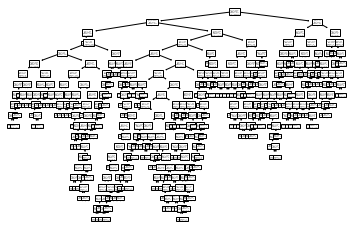

In [ ]:
tree.plot_tree(dclf)

### **As we have many features(16 features) it's hard to visualize the above decision tree which we got from the model Decision tree classifier.**

# **Random Forest**

In [ ]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)
for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


[0.  0.  0.  ... 0.4 0.1 0. ]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.885972850678733


In [ ]:
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred, pos_label=1)

In [ ]:
auc_score4 = roc_auc_score(y_test, y_pred)
print(auc_score4)

0.6410603715170279


In [ ]:
target_names = ['yes', 'no']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.97      0.94       969
          no       0.57      0.32      0.41       136

    accuracy                           0.89      1105
   macro avg       0.74      0.64      0.67      1105
weighted avg       0.87      0.89      0.87      1105



In [ ]:
models[4] =['Random Forest Regressor', accuracy_score(y_test, y_pred)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733]}

In [ ]:
AUC[4] =['Random Forest Regressor', auc_score4] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279]}

# **Support Vector Machines**

# **Radial kernel**

In [ ]:
cls = svm.SVC(C = 0.8, kernel='rbf', gamma = 0.005, decision_function_shape ='ovr')

In [ ]:
cls.fit(x_train, y_train)

SVC(C=0.8, gamma=0.005)

In [ ]:
pred_rbf = cls.predict(x_test)
pred_rbf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.accuracy_score(y_test,y_pred=pred_rbf))

0.8769230769230769


In [ ]:
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_rbf, pos_label=1)

In [ ]:
auc_score5 = roc_auc_score(y_test, pred_rbf)
print(auc_score5)

0.5


In [ ]:
target_names = ['yes', 'no']
print(classification_report(y_test, pred_rbf, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      1.00      0.93       969
          no       0.00      0.00      0.00       136

    accuracy                           0.88      1105
   macro avg       0.44      0.50      0.47      1105
weighted avg       0.77      0.88      0.82      1105



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models[5] =['svclassifier rbf', metrics.accuracy_score(y_test, pred_rbf)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769]}

In [ ]:
AUC[5] =['svclassifier rbf', auc_score5] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5]}

## **Linear kernel**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
pred_lin = svclassifier.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred=pred_lin))

0.8751131221719457


In [ ]:
target_names = ['yes', 'no']
print(classification_report(y_test, pred_lin, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.90      0.97      0.93       969
          no       0.48      0.22      0.30       136

    accuracy                           0.88      1105
   macro avg       0.69      0.59      0.62      1105
weighted avg       0.85      0.88      0.85      1105



In [ ]:
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_lin, pos_label=1)

In [ ]:
auc_score6 = roc_auc_score(y_test, pred_lin)
print(auc_score6)

0.5937822497420021


In [ ]:
models[6] =['svclassifier lin', metrics.accuracy_score(y_test, pred_lin)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457]}

In [ ]:
AUC[6] =['svclassifier lin', auc_score6] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021]}

## **Polynomial kernel**

In [ ]:
svclassifier = SVC(kernel='poly', degree=4)
svclassifier.fit(x_train, y_train)

SVC(degree=4, kernel='poly')

In [ ]:
pred_poly = svclassifier.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred=pred_poly))

0.8769230769230769


In [ ]:
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_poly, pos_label=1)

In [ ]:
auc_score7 = roc_auc_score(y_test, pred_poly)
print(auc_score7)

0.5


In [ ]:
target_names = ['yes', 'no']
print(classification_report(y_test, pred_poly, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      1.00      0.93       969
          no       0.00      0.00      0.00       136

    accuracy                           0.88      1105
   macro avg       0.44      0.50      0.47      1105
weighted avg       0.77      0.88      0.82      1105



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models[7] =['svclassifier poly', metrics.accuracy_score(y_test, pred_poly)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769]}

In [ ]:
AUC[7] =['svclassifier poly', auc_score7] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5]}

## **Sigmoid Kernel**

In [ ]:
svclassifier = SVC(kernel='sigmoid', degree=4)
svclassifier.fit(x_train, y_train)

SVC(degree=4, kernel='sigmoid')

In [ ]:
pred_sig = svclassifier.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred=pred_sig))

0.8705882352941177


In [ ]:
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_sig, pos_label=1)

In [ ]:
auc_score8 = roc_auc_score(y_test, pred_sig)
print(auc_score8)

0.5501160990712075


In [ ]:
print(classification_report(y_test,pred_sig))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       969
           1       0.41      0.12      0.19       136

    accuracy                           0.87      1105
   macro avg       0.65      0.55      0.56      1105
weighted avg       0.83      0.87      0.84      1105



In [ ]:
models[8] =['svclassifier sigmoid', metrics.accuracy_score(y_test, pred_sig)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769],
 8: ['svclassifier sigmoid', 0.8705882352941177]}

In [ ]:
AUC[8] =['svclassifier sigmoid', auc_score8] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5],
 8: ['svclassifier sigmoid', 0.5501160990712075]}

# **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)


0.8778280542986425


In [ ]:
fpr9, tpr9, thresh9 = roc_curve(y_test, predictions, pos_label=1)

In [ ]:
auc_score9 = roc_auc_score(y_test, predictions)
print(auc_score9)

0.5858488132094942


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       969
           1       0.51      0.20      0.29       136

    accuracy                           0.88      1105
   macro avg       0.70      0.59      0.61      1105
weighted avg       0.85      0.88      0.85      1105



In [ ]:
models[9] =['logisticRegr', score] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769],
 8: ['svclassifier sigmoid', 0.8705882352941177],
 9: ['logisticRegr', 0.8778280542986425]}

In [ ]:
AUC[9] =['logisticRegr', auc_score9] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5],
 8: ['svclassifier sigmoid', 0.5501160990712075],
 9: ['logisticRegr', 0.5858488132094942]}

# **PERCEPTRON**

In [ ]:
perceptron=Perceptron()
perceptron.fit(x_train,y_train)
pred=perceptron.predict(x_test)

In [ ]:
print(perceptron.score(x_test, y_test))

0.6742081447963801


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78       969
           1       0.23      0.73      0.35       136

    accuracy                           0.67      1105
   macro avg       0.59      0.70      0.57      1105
weighted avg       0.86      0.67      0.73      1105



In [ ]:
fpr10, tpr10, thresh10 = roc_curve(y_test, pred, pos_label=1)

In [ ]:
auc_score10 = roc_auc_score(y_test, pred)
print(auc_score10)

0.6973039215686275


In [ ]:
models[10] =['Perceptron', perceptron.score(x_test, y_test)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769],
 8: ['svclassifier sigmoid', 0.8705882352941177],
 9: ['logisticRegr', 0.8778280542986425],
 10: ['Perceptron', 0.6742081447963801]}

In [ ]:
AUC[10] =['Perceptron', auc_score10] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5],
 8: ['svclassifier sigmoid', 0.5501160990712075],
 9: ['logisticRegr', 0.5858488132094942],
 10: ['Perceptron', 0.6973039215686275]}

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
maxacc=[]
for i in range(1,20,2):
  model = KNeighborsClassifier(n_neighbors=i)  
  # Fitting the model
  model.fit(x_train, y_train)

  # Accuracy
  prediction = model.predict(x_test)
  maxacc.append(round(accuracy_score(y_test, prediction)*100,2))

print("accuracy: {}%".format(maxacc))

accuracy: [83.71, 86.7, 86.79, 87.15, 86.79, 86.7, 87.15, 87.24, 87.24, 87.33]%


In [ ]:
print("Best hyperparameter(K-value)",((np.argmax(maxacc)*2)+1))

Best hyperparameter(K-value) 19


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8733031674208145


In [ ]:
fpr11, tpr11, thresh11 = roc_curve(y_test, prediction, pos_label=1)

In [ ]:
auc_score11 = roc_auc_score(y_test, prediction)
print(auc_score11)

0.5516640866873065


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       969
           1       0.45      0.12      0.20       136

    accuracy                           0.87      1105
   macro avg       0.67      0.55      0.56      1105
weighted avg       0.83      0.87      0.84      1105



In [ ]:
models[11] =['K nearest neighbour', metrics.accuracy_score(y_test,prediction)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769],
 8: ['svclassifier sigmoid', 0.8705882352941177],
 9: ['logisticRegr', 0.8778280542986425],
 10: ['Perceptron', 0.6742081447963801],
 11: ['K nearest neighbour', 0.8733031674208145]}

In [ ]:
AUC[11] =['K nearest neighbour', auc_score11] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5],
 8: ['svclassifier sigmoid', 0.5501160990712075],
 9: ['logisticRegr', 0.5858488132094942],
 10: ['Perceptron', 0.6973039215686275],
 11: ['K nearest neighbour', 0.5516640866873065]}

# **Bernoulli Naive Bayes**

In [ ]:
nb = BernoulliNB()
nb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
pred_ber = nb.predict(x_test)
pred_ber

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.accuracy_score(y_test,y_pred=pred_ber))

0.8624434389140272


In [ ]:
fpr12, tpr12, thresh12 = roc_curve(y_test, pred_ber, pos_label=1)

In [ ]:
auc_score12 = roc_auc_score(y_test, pred_ber)
print(auc_score12)

0.5707559339525284


In [ ]:
print(classification_report(y_test,pred_ber))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       969
           1       0.38      0.18      0.25       136

    accuracy                           0.86      1105
   macro avg       0.64      0.57      0.59      1105
weighted avg       0.83      0.86      0.84      1105



In [ ]:
models[12] =['Bernoulli Naive Bayes', metrics.accuracy_score(y_test,y_pred=pred_ber)] 
models

{1: ['Gaussian Naive Bayes', 0.8506787330316742],
 2: ['Multinomial Naive Bayes', 0.49411764705882355],
 3: ['Decision Tree Classifier', 0.8597285067873304],
 4: ['Random Forest Regressor', 0.885972850678733],
 5: ['svclassifier rbf', 0.8769230769230769],
 6: ['svclassifier lin', 0.8751131221719457],
 7: ['svclassifier poly', 0.8769230769230769],
 8: ['svclassifier sigmoid', 0.8705882352941177],
 9: ['logisticRegr', 0.8778280542986425],
 10: ['Perceptron', 0.6742081447963801],
 11: ['K nearest neighbour', 0.8733031674208145],
 12: ['Bernoulli Naive Bayes', 0.8624434389140272]}

In [ ]:
AUC[12] =['bernoulli Naive Bayes', auc_score12] 
AUC

{1: ['Gaussian Naive Bayes', 0.6651831785345718],
 2: ['Multinomial Naive Bayes', 0.5914602683178535],
 3: ['Decision Tree Classifier', 0.682985036119711],
 4: ['Random Forest Regressor', 0.6410603715170279],
 5: ['svclassifier rbf', 0.5],
 6: ['svclassifier lin', 0.5937822497420021],
 7: ['svclassifier poly', 0.5],
 8: ['svclassifier sigmoid', 0.5501160990712075],
 9: ['logisticRegr', 0.5858488132094942],
 10: ['Perceptron', 0.6973039215686275],
 11: ['K nearest neighbour', 0.5516640866873065],
 12: ['bernoulli Naive Bayes', 0.5707559339525284]}

# **ROC curve**

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

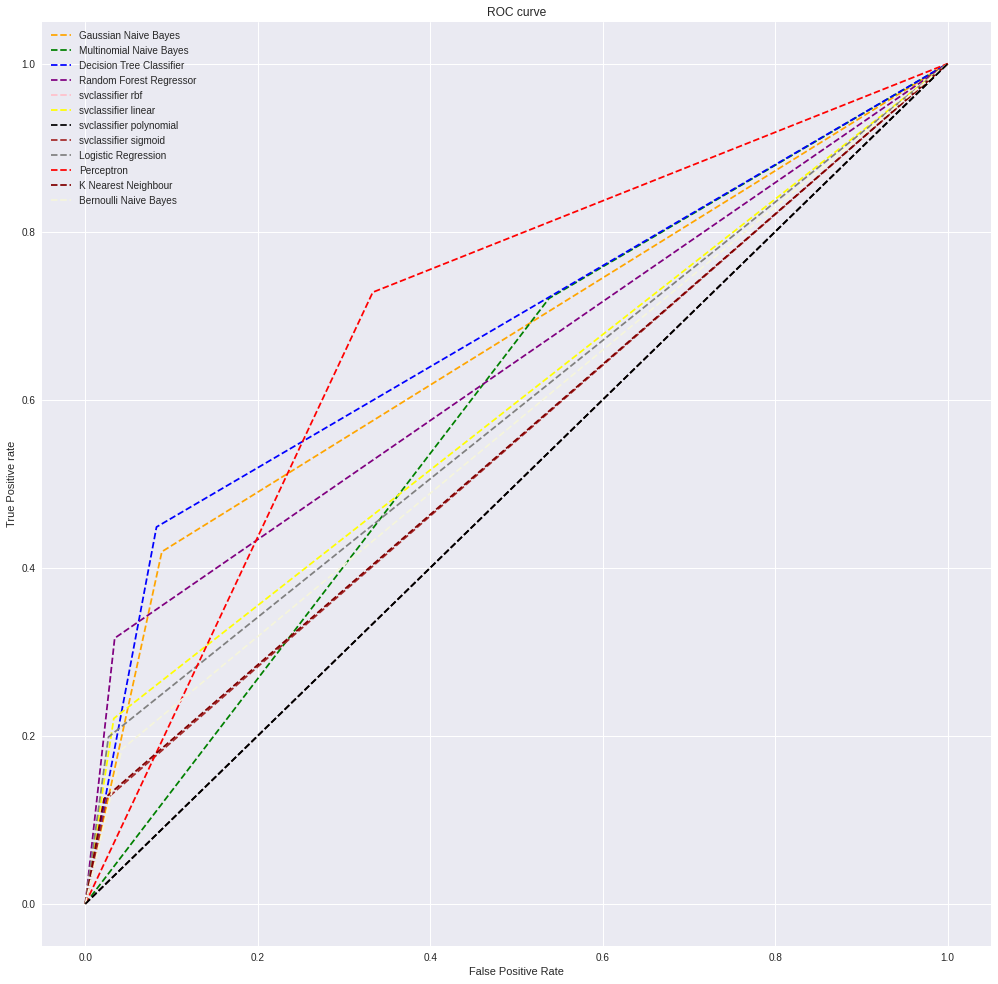

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(17, 17))

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Multinomial Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Decision Tree Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Random Forest Regressor')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='svclassifier rbf')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='svclassifier linear')
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='svclassifier polynomial')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='svclassifier sigmoid')
plt.plot(fpr9, tpr9, linestyle='--',color='grey', label='Logistic Regression')
plt.plot(fpr10, tpr10, linestyle='--',color='red', label='Perceptron')
plt.plot(fpr11, tpr11, linestyle='--',color='maroon', label='K Nearest Neighbour')
plt.plot(fpr12, tpr12, linestyle='--',color='beige', label='Bernoulli Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

# **Area under the Curve**

In [ ]:
print ("{:<8} {:<30} {:<10}".format('Pos','Model','Area under curve'))
for k, v in AUC.items():
    Model, Auc = v
    print ("{:<8} {:<30} {:<10}".format(k, Model, Auc))

Pos      Model                          Area under curve
1        Gaussian Naive Bayes           0.6651831785345718
2        Multinomial Naive Bayes        0.5914602683178535
3        Decision Tree Classifier       0.682985036119711
4        Random Forest Regressor        0.6410603715170279
5        svclassifier rbf               0.5       
6        svclassifier lin               0.5937822497420021
7        svclassifier poly              0.5       
8        svclassifier sigmoid           0.5501160990712075
9        logisticRegr                   0.5858488132094942
10       Perceptron                     0.6973039215686275
11       K nearest neighbour            0.5516640866873065
12       bernoulli Naive Bayes          0.5707559339525284


### **We can see that Perceptron has the highest Area under the curve value of 0.697. Even though Perceptron model fails to give us high accuracy, it does well in predicting positive class in the Dataset**

# **Models and their Accuracy**

In [ ]:
print ("{:<8} {:<30} {:<10}".format('Pos','Model','Accuracy'))
for k, v in models.items():
    Model, Acc = v
    print ("{:<8} {:<30} {:<10}".format(k, Model, Acc))

Pos      Model                          Accuracy  
1        Gaussian Naive Bayes           0.8506787330316742
2        Multinomial Naive Bayes        0.49411764705882355
3        Decision Tree Classifier       0.8597285067873304
4        Random Forest Regressor        0.885972850678733
5        svclassifier rbf               0.8769230769230769
6        svclassifier lin               0.8751131221719457
7        svclassifier poly              0.8769230769230769
8        svclassifier sigmoid           0.8705882352941177
9        logisticRegr                   0.8778280542986425
10       Perceptron                     0.6742081447963801
11       K nearest neighbour            0.8733031674208145
12       Bernoulli Naive Bayes          0.8624434389140272


## **As we know that the model with high accuracy will be the best model, lets find the model with high accuracy.            So we can clearly see that the model Random forest Regressor gives the high accuracy of 88.6%**

# **So we prefer the Model *RANDOM FOREST REGRESSOR* for this Dataset.**

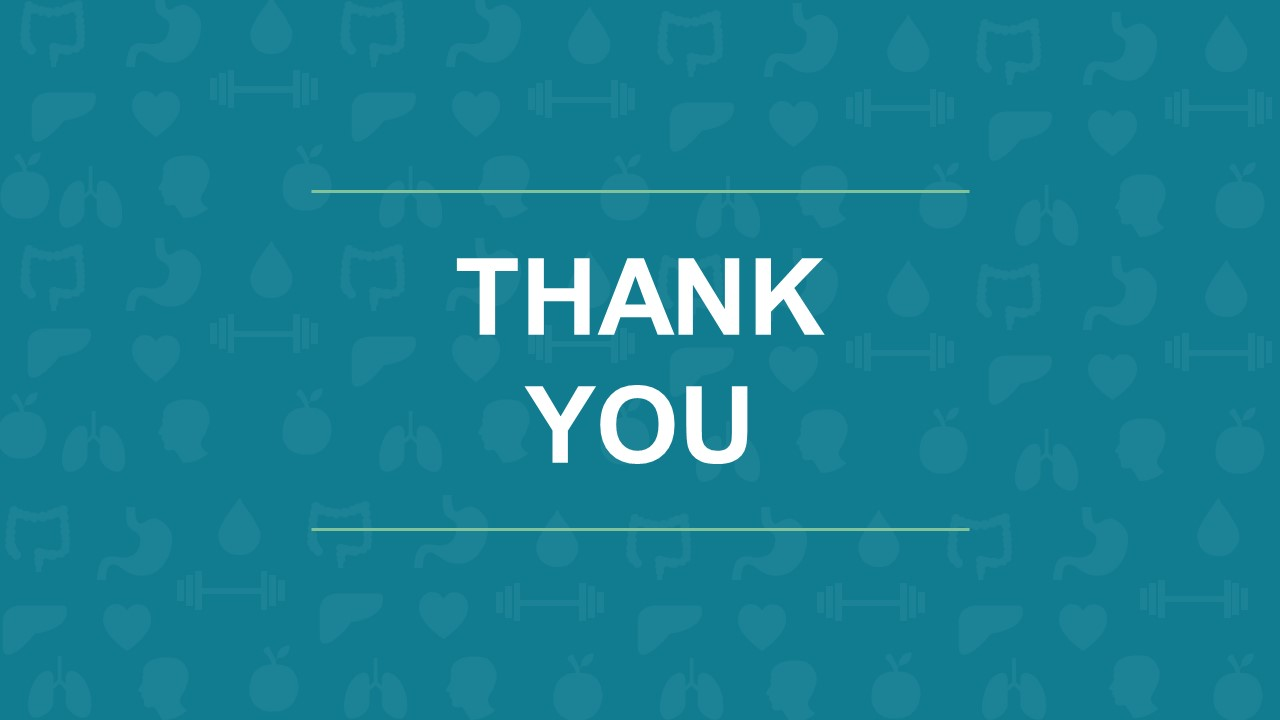